In [1]:
from matplotlib.ticker import MaxNLocator

In [2]:
import numpy as np
from hmmlearn import hmm
import csv
import matplotlib.pyplot as plt
import sys
from BW import *
import sys
sys.setrecursionlimit(1000000)
import datetime
from matplotlib.lines import Line2D

In [3]:
states = ["H1","H2"]
n_states = len(states)

observations = ["V1", "V2"]
n_observations = len(observations)

start_probability = np.array([0.5,0.5])

transition_probability=np.array([[0.2, 0.8],
       [0.7, 0.3]])

emission_probability = np.array([[0.75, 0.25],
       [0.3, 0.7]])
model = hmm.CategoricalHMM(n_components=n_states,n_iter=1000,tol=1e-15,init_params=" ",params="te")
model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability

In [4]:
np.random.seed(77)

In [5]:
X, Z = model.sample(100)
X.T

array([[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [6]:
for i in range(len(X.T[0])):
    print('v_'+repr(X.T[0][i]),end=',')
    if (i+1)%25==0:
        print(" \\\ ")

v_1,v_0,v_1,v_1,v_0,v_1,v_1,v_0,v_1,v_0,v_0,v_0,v_1,v_0,v_0,v_0,v_1,v_0,v_0,v_1,v_1,v_1,v_1,v_0,v_0, \\ 
v_1,v_1,v_0,v_0,v_0,v_1,v_0,v_1,v_1,v_1,v_1,v_0,v_0,v_0,v_1,v_1,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_1,v_1, \\ 
v_1,v_1,v_0,v_0,v_0,v_0,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_0,v_0,v_0,v_0,v_1,v_0,v_1,v_1,v_0,v_1,v_0,v_1, \\ 
v_0,v_1,v_0,v_1,v_0,v_1,v_0,v_0,v_1,v_1,v_1,v_1,v_0,v_1,v_1,v_0,v_0,v_0,v_0,v_0,v_0,v_1,v_1,v_1,v_1, \\ 


In [7]:
model.score(X.T.reshape(-1,1))

-68.79552007287361

In [8]:
#Starting from Uniform
tA=np.array([[0.5,0.5],[0.5,0.5]])
tB=np.array([[0.5,0.5],[0.5,0.5]])

In [9]:
tA,tB

(array([[0.5, 0.5],
        [0.5, 0.5]]),
 array([[0.5, 0.5],
        [0.5, 0.5]]))

In [10]:
model.transmat_=tA
model.emissionprob_=tB

In [11]:
model.score(X.T.reshape(-1,1))

-69.31471805599459

In [12]:
model=model.fit(X)

In [13]:
model.monitor_

ConvergenceMonitor(
    history=[-69.31471805599459, -69.29471672244782, -69.29471672244782],
    iter=3,
    n_iter=1000,
    tol=1e-15,
    verbose=False,
)

In [14]:
np.round(model.transmat_,3)

array([[0.5, 0.5],
       [0.5, 0.5]])

In [15]:
np.round(model.emissionprob_,3)

array([[0.51, 0.49],
       [0.51, 0.49]])

In [16]:
model.monitor_.converged

True

-69.29471672244782
[[0.5 0.5]
 [0.5 0.5]]
[[0.51 0.49]
 [0.51 0.49]]
-69.29471672244782


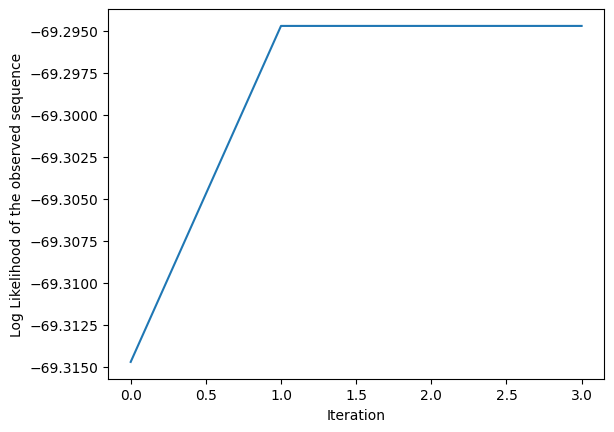

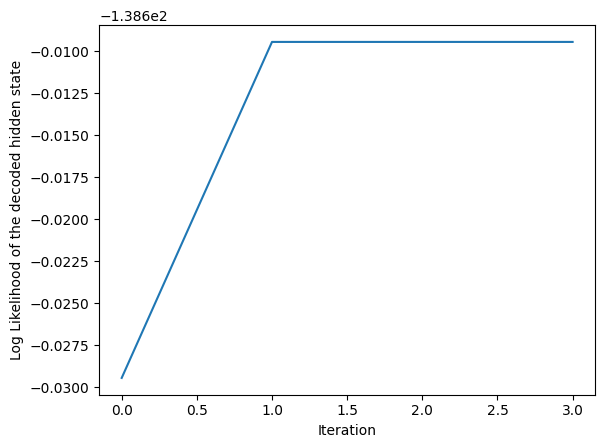

In [17]:
L1=BW(np.copy(start_probability),np.copy(tA),np.copy(tB),X,4)

[[0.5 0.5]
 [0.5 0.5]]
[[0.5 0.5]
 [0.5 0.5]]
-69.31471805599459


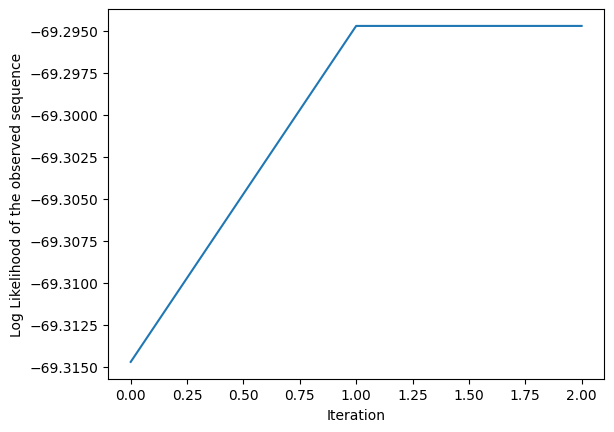

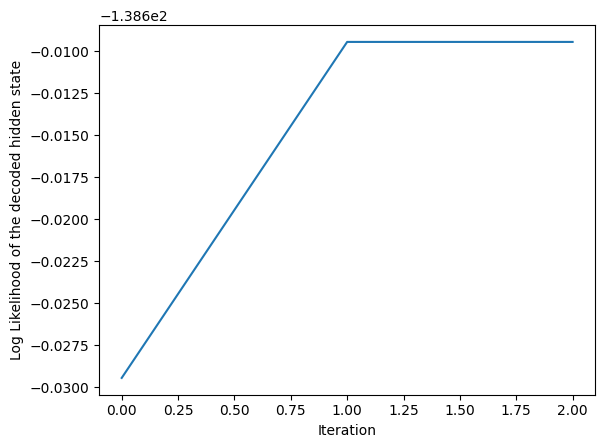

In [18]:
L1=BWlib(np.copy(start_probability),np.copy(tA),np.copy(tB),X,3)

In [19]:
np.round(model.transmat_,3)

array([[0.5, 0.5],
       [0.5, 0.5]])

In [20]:
np.round(model.emissionprob_,3)

array([[0.51, 0.49],
       [0.51, 0.49]])

In [21]:
transition_probability

array([[0.2, 0.8],
       [0.7, 0.3]])

In [22]:
from crnsimulator import ReactionGraph
from IPython.display import Image
import numpy as np
from HMMCRN import *
import crnsimulator

In [23]:
R=HMMCRN(['H1','H2'],['V1','V2'])
ob=X
R.Ob=ob
Tr=R.EM()
RG=ReactionGraph(Tr)

In [41]:
%%time
filename,odename=RG.write_ODE_lib(filename='ReactionSimulator.py')

CPU times: user 1min 9s, sys: 857 ms, total: 1min 10s
Wall time: 1min 11s


In [24]:
theta0=np.array([0.5,0.5])
n=2
m=2
l=len(ob)
#I=BW_init(theta0,tA,tB,X.T[0])
I=uni_init(n,m,X.T[0])
start=init_simulator(n,m,l,I,'ReactionSimulator.py')

In [25]:
!python ReactionSimulator.py --a 1e-3 --r 1e-3 --t8 1 --t-lin 100 --nxy>100.dat

CRN initialization
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.5 0.5]
 [0.5 0.5]]
Emission:
 [[0.5 0.5]
 [0.5 0.5]]

CRN Equilibrium
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.5 0.5]
 [0.5 0.5]]
Emission:
 [[0.51 0.49]
 [0.51 0.49]]


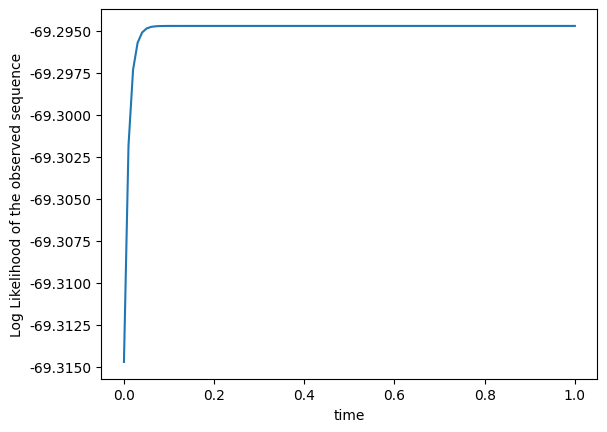

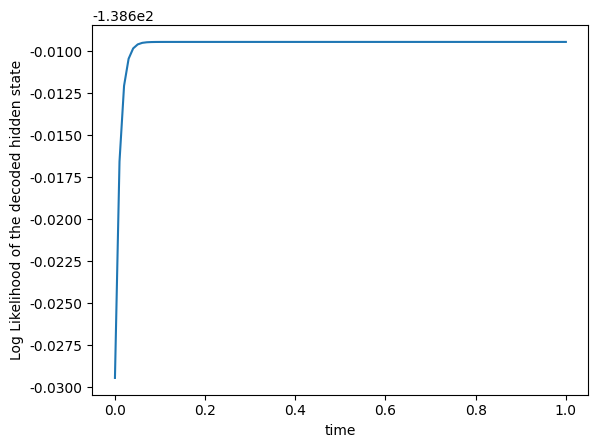

-69.2947167224477
CRN_Transition fit:
 [[0.5 0.5]
 [0.5 0.5]]
 
CRN_Emission fit:
 [[0.51 0.49]
 [0.51 0.49]]


In [41]:
Final=!tail -n 2 100.dat
Init=!head -n 2 100.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('100.dat',start,ob)

In [42]:
#Image(filename='o100.png')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

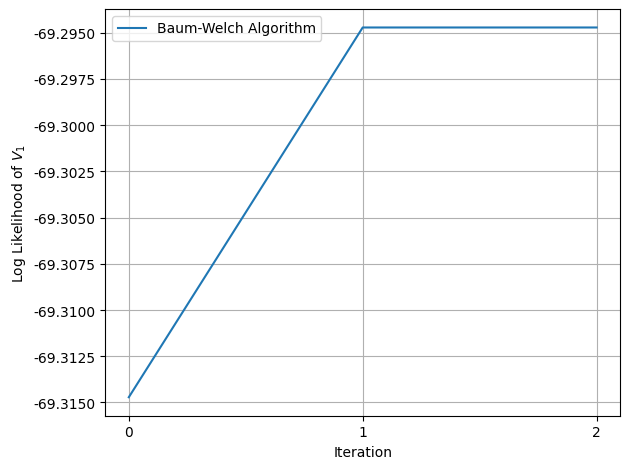

In [43]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax1.set_xlabel('Iteration')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend()
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100uni_initBW.pdf', format='pdf', dpi=1000)
plt.show()

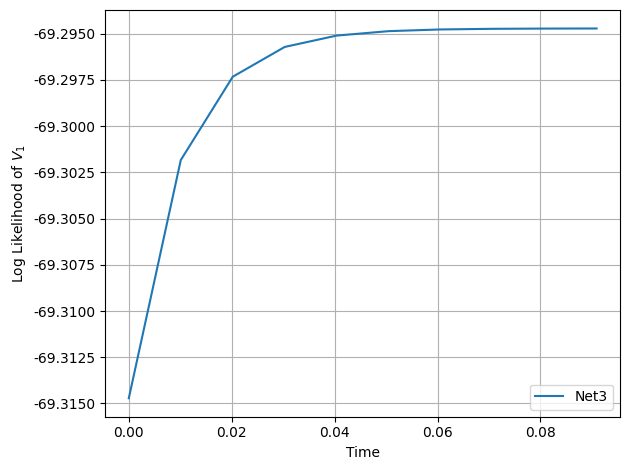

In [44]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(t1[:10],c1L[:10], label=r'Net3')
ax1.set_xlabel('Time')
fig.tight_layout()
ax1.legend(loc='lower right')
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100uni_initNet3.pdf', format='pdf', dpi=1000)
plt.show()

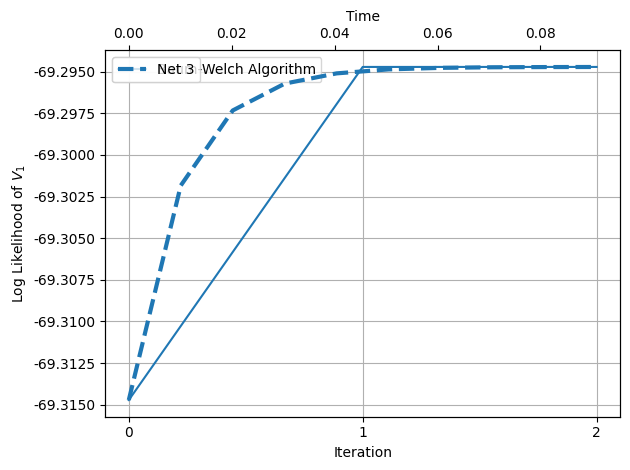

In [45]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
#ax1.set_facecolor('white')
ax1.grid(True)
ax2.grid(False)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax2.plot(t1[:10],c1L[:10],'--',linewidth=3, label=r'Net 3')
ax1.set_xlabel('Iteration')
ax2.set_xlabel('Time')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend(loc='best')
ax2.legend(loc='best')
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100uni_init-mix.pdf', format='pdf', dpi=1000)
plt.show()

In [46]:
theta0=np.array([0.5,0.5])
n=2
m=2
l=len(ob)
I=ran_init(n,m,X.T[0],seed=41)
start=init_simulator(n,m,l,I,'ReactionSimulator.py')

In [47]:
%%time
!python ReactionSimulator.py --a 1e-6 --r 1e-6 --t8 5500 --t-lin 100 --nxy>100.dat

CPU times: user 1.11 s, sys: 295 ms, total: 1.41 s
Wall time: 1min 30s


CRN initialization
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.77409994 0.22590006]
 [0.42733296 0.57266704]]
Emission:
 [[0.91602762 0.08397238]
 [0.51010622 0.48989378]]

CRN Equilibrium
Starting Prob:
 [0.5 0.5]
Transition:
 [[0.    1.   ]
 [0.228 0.772]]
Emission:
 [[-0.    1.  ]
 [ 0.63  0.37]]


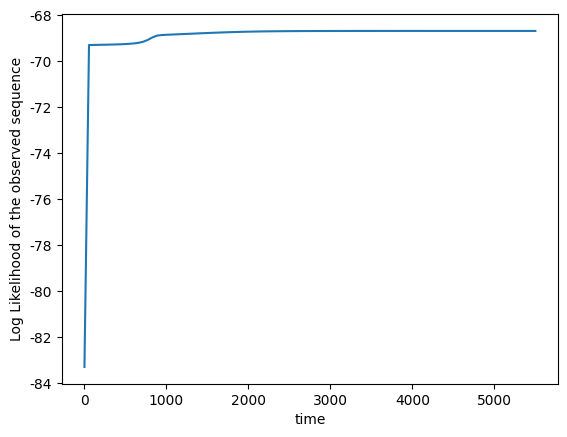

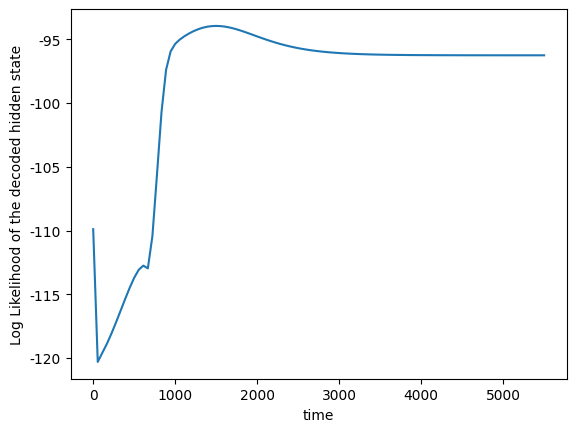

-68.67525892722414
CRN_Transition fit:
 [[0.    1.   ]
 [0.228 0.772]]
 
CRN_Emission fit:
 [[0.   1.  ]
 [0.63 0.37]]


In [48]:
Final=!tail -n 1 100.dat
Init=!head -n 1 100.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('100.dat',start,ob)

In [49]:
tA,tB=np.array([[0.77409994,0.22590006],[0.42733296,0.57266704]]),np.array([[0.91602762,0.08397238],[0.51010622,0.48989378]])

In [50]:
model.transmat_=tA
model.emissionprob_=tB
model.score(X.T.reshape(-1,1))

-83.30064135554429

In [51]:
%%time
model=model.fit(X)
model.monitor_

CPU times: user 320 ms, sys: 5.12 ms, total: 325 ms
Wall time: 328 ms


ConvergenceMonitor(
    history=[-83.30064135554429, -69.8881102731306, -69.76359951051047, -69.68147840215842, -69.62332337240325, -69.57997034116796, -69.5463657998934, -69.51951044180478, -69.49751828796306, -69.47914680704945, -69.46354528673096, -69.4501121705026, -69.4384102339477, -69.42811407789749, -69.41897648282169, -69.41080619245047, -69.40345285324632, -69.39679656474517, -69.39074047750013, -69.38520545164884, -69.3801261374742, -69.375448055495, -69.37112539097681, -69.36711930692897, -69.36339663867001, -69.35992887283494, -69.35669134093712, -69.35366257655471, -69.35082379857275, -69.34815849246226, -69.34565206847778, -69.34329158070882, -69.34106549464063, -69.33896349367802, -69.33697631716429, -69.33509562403592, -69.33331387746314, -69.3316242467706, -69.33002052366726, -69.32849705038352, -69.32704865776365, -69.32567061172898, -69.32435856680009, -69.32310852560431, -69.32191680347651, -69.32077999741044, -69.31969495874006, -69.31865876903095, -69.31766871874

In [52]:
model.monitor_.converged

True

In [53]:
print(np.round(tA,3),'\n',np.round(tB,3))

[[0.774 0.226]
 [0.427 0.573]] 
 [[0.916 0.084]
 [0.51  0.49 ]]


[[0.774 0.226]
 [0.427 0.573]]
[[0.916 0.084]
 [0.51  0.49 ]]
-83.30064135554429


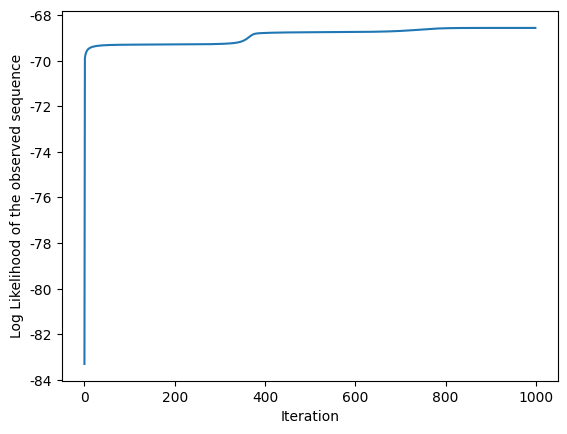

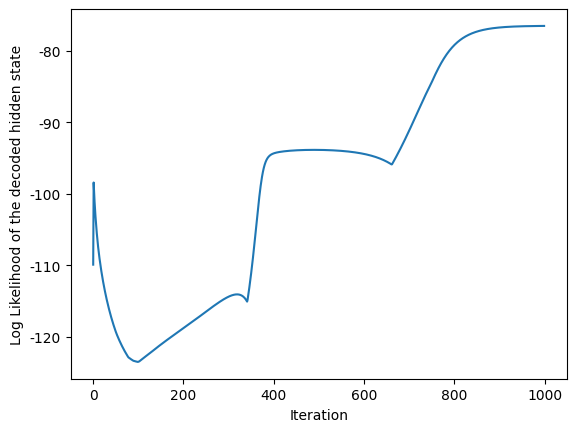

In [54]:
L1=BWlib(np.copy(start_probability),np.copy(tA),np.copy(tB),X,1000)

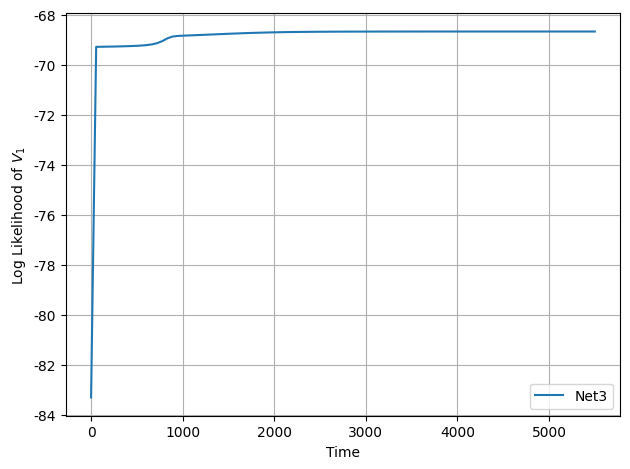

In [55]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(t1,c1L, label=r'Net3')
ax1.set_xlabel('Time')
fig.tight_layout()
ax1.legend(loc='lower right')
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100ran_initNet3.pdf', format='pdf', dpi=1000)
plt.show()

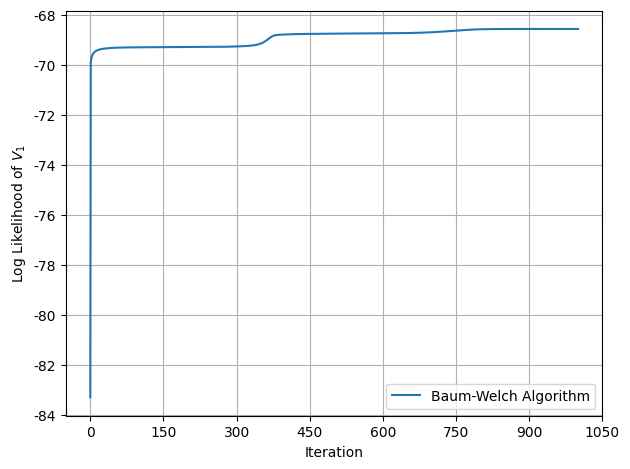

In [56]:
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(np.linspace(0,1000,1000),L1, label=r'Baum-Welch Algorithm')
ax1.set_xlabel('Iteration')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend()
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100ran_initBW.pdf', format='pdf', dpi=1000)
plt.show()